In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import os
import math

In [11]:
# change here
base_path = './'

# Import dataframe of adsorption energy, height and orientation of water molecule 

#df_output = pd.read_csv(base_path + "lammps_T1400.log", sep=' ')

14.749251355133321 13519.22606364429 0.8783170451668759 1.4933214394394315e-60 0.5934613557551214


Text(0, 0.5, 'Square displacement ($A^2$)')

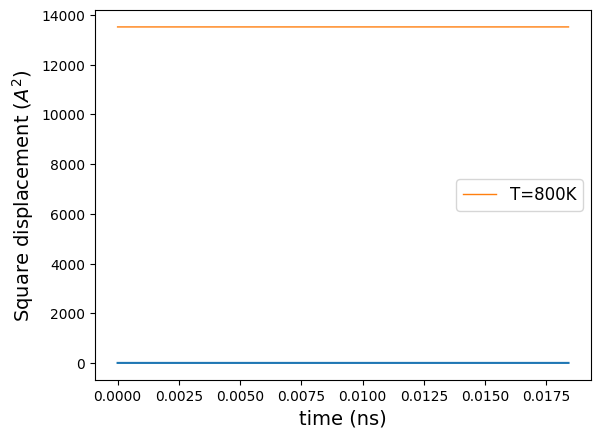

In [ ]:
TEMP = [800, 1000, 1200, 1400]
Diffusivity = [0,0,0]
counter = 0
for i in TEMP:
  #p = np.genfromtxt (base_path + "lammps_T%d.log" %i, skip_header=114, skip_footer=123)
  p = np.genfromtxt (base_path + "lammps_T%d.log" %i, skip_header=85, skip_footer=24)
  temperature = p[:,1]
  c = np.where(temperature > i)
  time = (p[c[0][0]:,0]-p[c[0][0],0])*10**(-6)
  totLen=len(time)
  Disp1 = p[c[0][0]:,-1]
  slope, intercept, r_value, p_value, std_err = stats.linregress(time, Disp1)
  Diffusivity [counter] = slope/6
  counter = counter + 1
  t_final = time[-1]
  y = t_final * slope
  plt.plot([0,t_final],[0,y])
  
  print(slope, intercept, r_value, p_value, std_err)
  plt.plot(time, Disp1, linewidth=1, linestyle='-', label='T=' + str(i) + 'K')
  plt.legend(prop={'size': 12}, ncol=1)

plt.yscale("linear")
plt.xscale("linear")
plt.xlabel('time (ns)', fontsize = 14)   
plt.ylabel(r'Square displacement ($A^2$)', fontsize = 14)

/tmp/ipykernel_3789233/517206858.py:3: RuntimeWarning: divide by zero encountered in log
  log_D = np.log(np.array(Diffusivity))


ValueError: x and y must be the same size

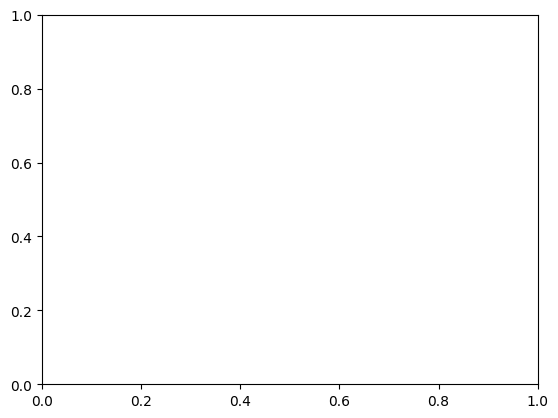

In [13]:
K_B = 8.617e-5;
TEMP_inv = 1/np.array(TEMP)
log_D = np.log(np.array(Diffusivity))
plt.scatter(TEMP_inv,log_D)

plt.yscale("linear")
plt.xscale("linear")
plt.xlabel(r'1/T ($K^{-1}$))', fontsize = 14)   
plt.ylabel(r'Log (D) ($A^2/s$)', fontsize = 14)

slope, intercept, r_value, p_value, std_err = stats.linregress(TEMP_inv,log_D)
Y = intercept + slope * (TEMP_inv)
plt.plot(TEMP_inv,Y)
print(slope, intercept, r_value, p_value, std_err)
Q = - slope * K_B
print('activation energy of H diffusivity in this system is' ,   Q , 'eV') 

